In [1]:
# Imports:
import numpy as np
import matplotlib.pyplot as plt

from pycity_scheduling.classes import *
from pycity_scheduling.algorithms import *

In [2]:
# The environment:
t = Timer(op_horizon=24, step_size=3600, initial_date=(2018, 1, 1))
p = Prices(timer=t)
w = Weather(timer=t)
env = Environment(timer=t, weather=w, prices=p)

In [3]:
# The CityDistrict object:
cd = CityDistrict(environment=env, objective='peak-shaving')

In [4]:
# Definition of the first building object:
bd1 = Building(environment=env, objective='none')
cd.addEntity(entity=bd1, position=[0, 1])

ap = Apartment(environment=env)
bd1.addEntity(ap)

bes = BuildingEnergySystem(environment=env)
bd1.addEntity(bes)

pv = Photovoltaic(environment=env, method=1, peak_power=15.0, beta=30.0)
bes.addDevice(pv)

In [5]:
# Definition of the second building object:
bd2 = Building(environment=env, objective='none')
cd.addEntity(entity=bd2, position=[0, 2])

ap = Apartment(environment=env)
bd2.addEntity(ap)

bes = BuildingEnergySystem(environment=env)
bd2.addEntity(bes)

In [6]:
# Perform the scheduling:
opt = CentralOptimization(city_district=cd)
res = opt.solve()

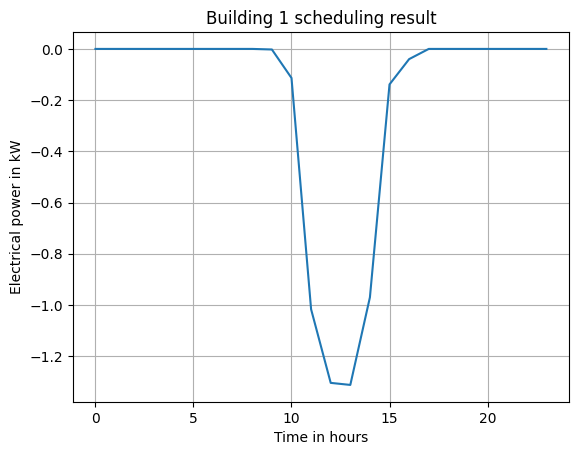

In [7]:
# Plot the first building's electrical power schedule:
plt.plot(bd1.p_el_schedule)
plt.xlabel('Time in hours')
plt.ylabel('Electrical power in kW')
plt.title('Building 1 scheduling result')
plt.grid()
plt.show()

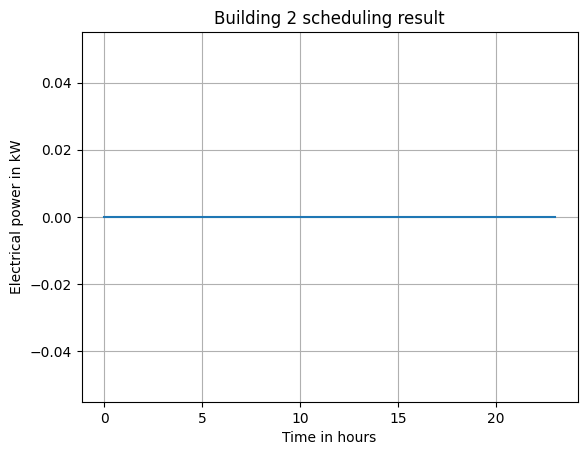

In [8]:
# Plot the second building's electrical power schedule:
plt.plot(bd2.p_el_schedule)
plt.xlabel('Time in hours')
plt.ylabel('Electrical power in kW')
plt.title('Building 2 scheduling result')
plt.grid()
plt.show()

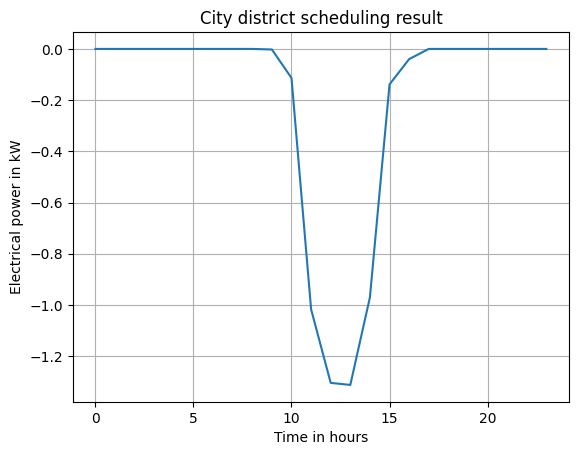

In [9]:
# Plot the city district's electrical power schedule:
plt.plot(cd.p_el_schedule)
plt.xlabel('Time in hours')
plt.ylabel('Electrical power in kW')
plt.title('City district scheduling result')
plt.grid()
plt.show()